<a href="https://colab.research.google.com/github/anpham1331372/ECGR5106/blob/main/ECGR5106_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#alexnet cifar10 without dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a simplified VGG model
class SimpleVGG(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        # First Conv Block
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Second Conv Block
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Third Conv Block
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Fully Connected Layers
        self.add(Flatten())
        self.add(Dense(512, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleVGG((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
#Modified ALexNet with CIFAR-10 WITH Dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a simplified AlexNet model with Dropout
class SimpleAlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))
        self.add(Dropout(0.25))

        self.add(Conv2D(128, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))
        self.add(Dropout(0.25))

        self.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))
        self.add(Dropout(0.25))

        self.add(Flatten())
        self.add(Dense(512, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleAlexNet((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.0099 - loss: 4.6066 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0099 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0102 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.0089 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0094 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.0084 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0095 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/100
782/782 ━━━━━━━━━

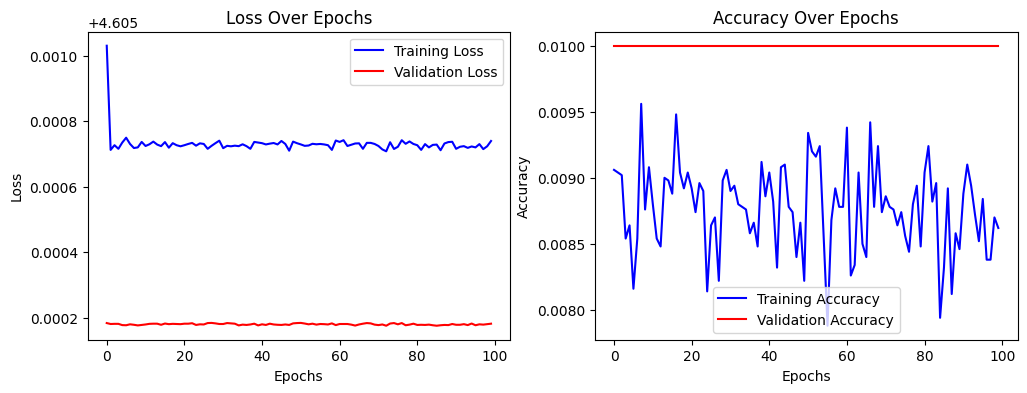

Model: "simple_alex_net_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 192)         │         166,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 384)           │         663,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,177,838 (96.05 MB)

 Trainable params: 8,392,612 (32.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,785,226 (64.03 MB)

In [ ]:
#MOdified AlexNet with CIFAR 100 without Dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
num_classes = 100

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a simplified AlexNet model for CIFAR-100
class SimpleAlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(192, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Flatten())
        self.add(Dense(1024, activation='relu'))
        self.add(Dense(1024, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleAlexNet((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
# Modified AlexNet with CIFAR-100 with Dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
num_classes = 100

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define AlexNet-based model with Dropout
class SimpleAlexNetWithDropout(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(192, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Flatten())
        self.add(Dense(1024, activation='relu'))
        self.add(Dropout(0.5))  # Dropout added
        self.add(Dense(1024, activation='relu'))
        self.add(Dropout(0.5))  # Dropout added
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleAlexNetWithDropout((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
#vgg net cifar10 without dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a simplified VGG model
class SimpleVGG(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        # First Conv Block
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Second Conv Block
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Third Conv Block
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Fully Connected Layers
        self.add(Flatten())
        self.add(Dense(512, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleVGG((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
#Modified VGG CIFAR 10 With Dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a VGG-like model with Dropout
class SimpleVGG_Dropout(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        # First Conv Block
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Second Conv Block
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Third Conv Block
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Fully Connected Layers with Dropout
        self.add(Flatten())
        self.add(Dense(512, activation='relu'))
        self.add(Dropout(0.5))  # 50% dropout
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleVGG_Dropout((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
#modified vgg with cifar100 with dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
num_classes = 100  # CIFAR-100 has 100 classes

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a VGG-like model for CIFAR-100 (with dropout)
class SimpleVGG_CIFAR100_Dropout(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        # First Conv Block
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Second Conv Block
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Third Conv Block
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        # Fully Connected Layers with Dropout
        self.add(Flatten())
        self.add(Dense(512, activation='relu'))
        self.add(Dropout(0.5))  # Dropout added
        self.add(Dense(num_classes, activation='softmax'))  # 100 classes

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleVGG_CIFAR100_Dropout((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 50
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
#resnet18 cifar10 without dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Add, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Define Residual Block
class ResidualBlock(Model):
    def __init__(self, filters, downsample=False):
        super(ResidualBlock, self).__init__()

        self.conv1 = Conv2D(filters, kernel_size=3, strides=1 if not downsample else 2, padding='same')
        self.bn1 = BatchNormalization()
        self.relu = ReLU()

        self.conv2 = Conv2D(filters, kernel_size=3, strides=1, padding='same')
        self.bn2 = BatchNormalization()

        self.downsample = downsample
        if downsample:
            self.identity_downsample = Conv2D(filters, kernel_size=1, strides=2, padding='same')

    def call(self, x):
        identity = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample:
            identity = self.identity_downsample(identity)

        x = Add()([x, identity])
        x = ReLU()(x)

        return x


# Define ResNet-18 Model
class ResNet18(Model):
    def __init__(self, input_shape, num_classes):
        super(ResNet18, self).__init__()

        self.conv1 = Conv2D(64, kernel_size=3, strides=1, padding='same', input_shape=input_shape)  # Changed kernel size from 7 to 3 (for CIFAR-10)
        self.bn1 = BatchNormalization()
        self.relu = ReLU()
        self.maxpool = MaxPooling2D(pool_size=2, strides=2, padding='same')  # Reduced pooling size

        # Residual layers
        self.layer1 = self.make_layer(64, 2, downsample=False)
        self.layer2 = self.make_layer(128, 2, downsample=True)
        self.layer3 = self.make_layer(256, 2, downsample=True)
        self.layer4 = self.make_layer(512, 2, downsample=True)

        self.global_avg_pool = GlobalAveragePooling2D()  # **Fix: Using Global Average Pooling**
        self.fc = Dense(num_classes, activation='softmax')

    def make_layer(self, filters, blocks, downsample):
        layers = []
        layers.append(ResidualBlock(filters, downsample))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(filters))
        return layers

    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        for layer in self.layer1:
            x = layer(x)
        for layer in self.layer2:
            x = layer(x)
        for layer in self.layer3:
            x = layer(x)
        for layer in self.layer4:
            x = layer(x)

        x = self.global_avg_pool(x)  # **Fix: Use GlobalAveragePooling2D**
        x = self.fc(x)

        return x


# Initialize model
input_shape = (32, 32, 3)
model = ResNet18(input_shape, num_classes)

# Compile model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
#resnet-18 cifar10 with dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Add, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Define Residual Block
class ResidualBlock(Model):
    def __init__(self, filters, downsample=False):
        super(ResidualBlock, self).__init__()

        self.conv1 = Conv2D(filters, kernel_size=3, strides=1 if not downsample else 2, padding='same')
        self.bn1 = BatchNormalization()
        self.relu = ReLU()

        self.conv2 = Conv2D(filters, kernel_size=3, strides=1, padding='same')
        self.bn2 = BatchNormalization()

        self.downsample = downsample
        if downsample:
            self.identity_downsample = Conv2D(filters, kernel_size=1, strides=2, padding='same')

    def call(self, x):
        identity = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample:
            identity = self.identity_downsample(identity)

        x = Add()([x, identity])
        x = ReLU()(x)

        return x


# Define ResNet-18 Model with Dropout
class ResNet18_Dropout(Model):
    def __init__(self, input_shape, num_classes):
        super(ResNet18_Dropout, self).__init__()

        self.conv1 = Conv2D(64, kernel_size=3, strides=1, padding='same', input_shape=input_shape)  # Adjusted kernel for CIFAR-10
        self.bn1 = BatchNormalization()
        self.relu = ReLU()
        self.maxpool = MaxPooling2D(pool_size=2, strides=2, padding='same')

        # Residual layers
        self.layer1 = self.make_layer(64, 2, downsample=False)
        self.layer2 = self.make_layer(128, 2, downsample=True)
        self.layer3 = self.make_layer(256, 2, downsample=True)
        self.layer4 = self.make_layer(512, 2, downsample=True)

        self.global_avg_pool = GlobalAveragePooling2D()
        self.dropout = Dropout(0.5)  # **Added Dropout**
        self.fc = Dense(num_classes, activation='softmax')

    def make_layer(self, filters, blocks, downsample):
        layers = []
        layers.append(ResidualBlock(filters, downsample))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(filters))
        return layers

    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        for layer in self.layer1:
            x = layer(x)
        for layer in self.layer2:
            x = layer(x)
        for layer in self.layer3:
            x = layer(x)
        for layer in self.layer4:
            x = layer(x)

        x = self.global_avg_pool(x)
        x = self.dropout(x)  # **Dropout before the fully connected layer**
        x = self.fc(x)

        return x


# Initialize model
input_shape = (32, 32, 3)
model = ResNet18_Dropout(input_shape, num_classes)

# Compile model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
#resnet-18 cifar100 without dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Add, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
num_classes = 100  # Adjusted for CIFAR-100

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Define Residual Block
class ResidualBlock(Model):
    def __init__(self, filters, downsample=False):
        super(ResidualBlock, self).__init__()

        self.conv1 = Conv2D(filters, kernel_size=3, strides=1 if not downsample else 2, padding='same')
        self.bn1 = BatchNormalization()
        self.relu = ReLU()

        self.conv2 = Conv2D(filters, kernel_size=3, strides=1, padding='same')
        self.bn2 = BatchNormalization()

        self.downsample = downsample
        if downsample:
            self.identity_downsample = Conv2D(filters, kernel_size=1, strides=2, padding='same')

    def call(self, x):
        identity = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample:
            identity = self.identity_downsample(identity)

        x = Add()([x, identity])
        x = ReLU()(x)

        return x


# Define ResNet-18 Model (CIFAR-100, No Dropout)
class ResNet18_CIFAR100(Model):
    def __init__(self, input_shape, num_classes):
        super(ResNet18_CIFAR100, self).__init__()

        self.conv1 = Conv2D(64, kernel_size=3, strides=1, padding='same', input_shape=input_shape)  # Adjusted kernel for CIFAR-100
        self.bn1 = BatchNormalization()
        self.relu = ReLU()
        self.maxpool = MaxPooling2D(pool_size=2, strides=2, padding='same')

        # Residual layers
        self.layer1 = self.make_layer(64, 2, downsample=False)
        self.layer2 = self.make_layer(128, 2, downsample=True)
        self.layer3 = self.make_layer(256, 2, downsample=True)
        self.layer4 = self.make_layer(512, 2, downsample=True)

        self.global_avg_pool = GlobalAveragePooling2D()
        self.fc = Dense(num_classes, activation='softmax')  # Adjusted for 100 classes

    def make_layer(self, filters, blocks, downsample):
        layers = []
        layers.append(ResidualBlock(filters, downsample))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(filters))
        return layers

    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        for layer in self.layer1:
            x = layer(x)
        for layer in self.layer2:
            x = layer(x)
        for layer in self.layer3:
            x = layer(x)
        for layer in self.layer4:
            x = layer(x)

        x = self.global_avg_pool(x)
        x = self.fc(x)

        return x


# Initialize model
input_shape = (32, 32, 3)
model = ResNet18_CIFAR100(input_shape, num_classes)

# Compile model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
#resnet-18 with cifar100 with dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Add, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
num_classes = 100  # Adjusted for CIFAR-100

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Define Residual Block
class ResidualBlock(Model):
    def __init__(self, filters, downsample=False):
        super(ResidualBlock, self).__init__()

        self.conv1 = Conv2D(filters, kernel_size=3, strides=1 if not downsample else 2, padding='same')
        self.bn1 = BatchNormalization()
        self.relu = ReLU()

        self.conv2 = Conv2D(filters, kernel_size=3, strides=1, padding='same')
        self.bn2 = BatchNormalization()

        self.downsample = downsample
        if downsample:
            self.identity_downsample = Conv2D(filters, kernel_size=1, strides=2, padding='same')

    def call(self, x):
        identity = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample:
            identity = self.identity_downsample(identity)

        x = Add()([x, identity])
        x = ReLU()(x)

        return x


# Define ResNet-18 Model (CIFAR-100, With Dropout)
class ResNet18_CIFAR100_Dropout(Model):
    def __init__(self, input_shape, num_classes):
        super(ResNet18_CIFAR100_Dropout, self).__init__()

        self.conv1 = Conv2D(64, kernel_size=3, strides=1, padding='same', input_shape=input_shape)  # Adjusted kernel for CIFAR-100
        self.bn1 = BatchNormalization()
        self.relu = ReLU()
        self.maxpool = MaxPooling2D(pool_size=2, strides=2, padding='same')

        # Residual layers
        self.layer1 = self.make_layer(64, 2, downsample=False)
        self.layer2 = self.make_layer(128, 2, downsample=True)
        self.layer3 = self.make_layer(256, 2, downsample=True)
        self.layer4 = self.make_layer(512, 2, downsample=True)

        self.global_avg_pool = GlobalAveragePooling2D()
        self.dropout = Dropout(0.5)  # **Added Dropout**
        self.fc = Dense(num_classes, activation='softmax')  # Adjusted for 100 classes

    def make_layer(self, filters, blocks, downsample):
        layers = []
        layers.append(ResidualBlock(filters, downsample))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(filters))
        return layers

    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        for layer in self.layer1:
            x = layer(x)
        for layer in self.layer2:
            x = layer(x)
        for layer in self.layer3:
            x = layer(x)
        for layer in self.layer4:
            x = layer(x)

        x = self.global_avg_pool(x)
        x = self.dropout(x)  # **Dropout before the fully connected layer**
        x = self.fc(x)

        return x


# Initialize model
input_shape = (32, 32, 3)
model = ResNet18_CIFAR100_Dropout(input_shape, num_classes)

# Compile model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()
